In [ ]:
from google.colab import files
filenya = files.upload()

Saving cust_seg.csv to cust_seg.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
import statistics

In [ ]:
#Membaca dataset
df = pd.read_csv('cust_seg.csv')
df

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2
...,...,...,...,...,...,...,...,...,...,...
195,31,1,2,2,2,1,55,59,62.4,64.9
196,145,1,4,2,1,3,42,46,45.6,50.6
197,187,1,4,2,2,1,57,41,68.4,45.1
198,118,1,4,2,1,1,55,62,69.6,68.2


In [ ]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [ ]:
# Melihat deskripsi dataset
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


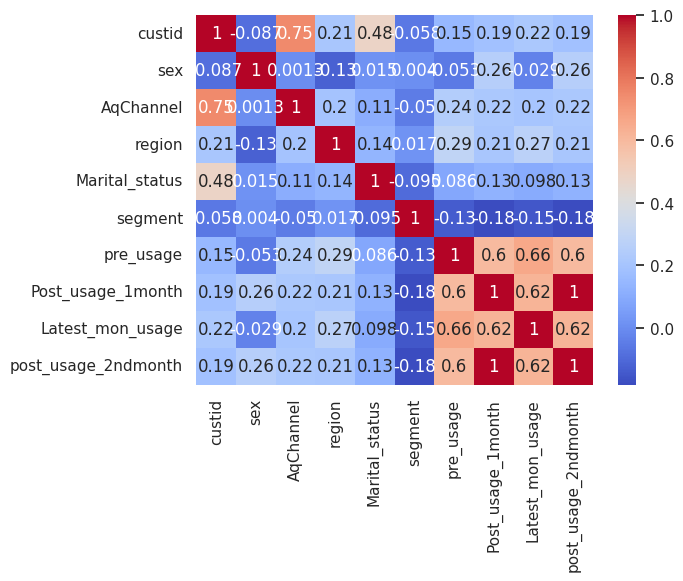

In [ ]:
# Melihat korelasi antara kolom-kolom pada dataset
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

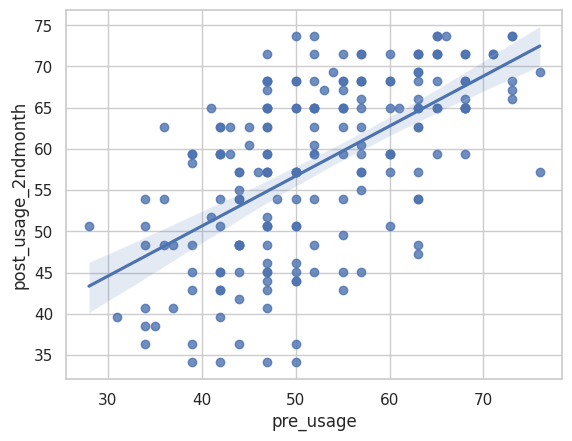

In [ ]:
# Regresi sederhana hubungan antara pre_usage dan post_usage_2ndmonth
sns.regplot(x='pre_usage', y='post_usage_2ndmonth', data=df)
plt.show()

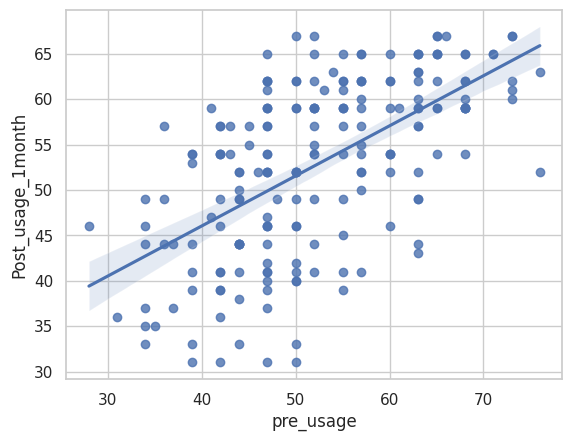

In [ ]:
# Regresi sederhana hubungan antara pre_usage dan post_usage_1ndmonth
sns.regplot(x='pre_usage', y='Post_usage_1month', data=df)
plt.show()

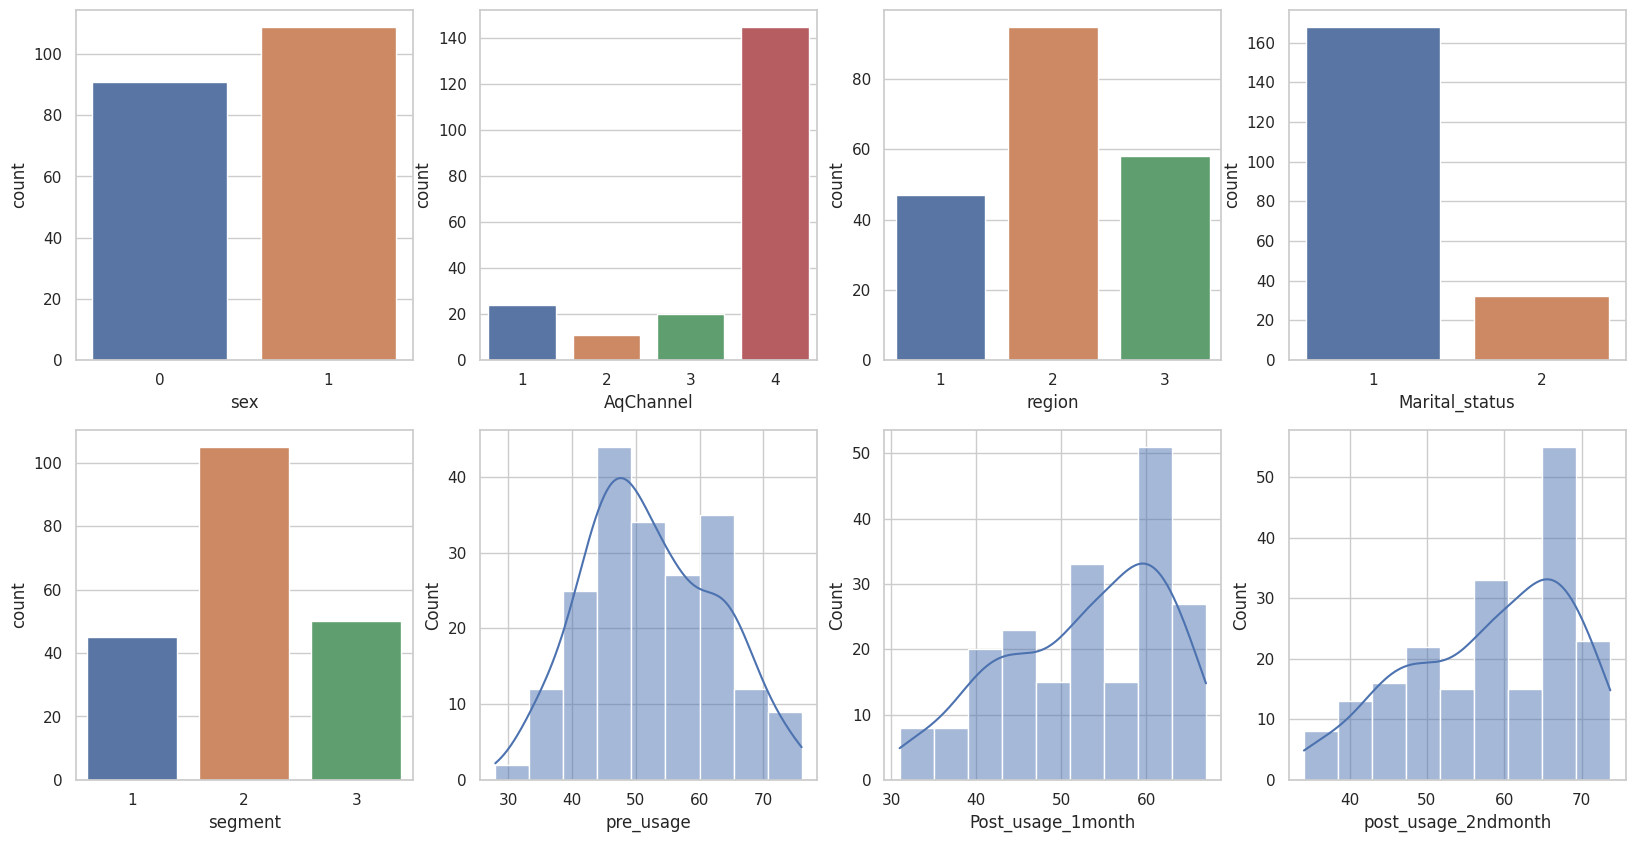

In [ ]:
#Visualisasi distribusi data dari setiap kolom menggunakan countplot/histogram dan density plot
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

sns.countplot(ax=axes[0, 0], x=df["sex"])
sns.countplot(ax=axes[0, 1], x=df["AqChannel"])
sns.countplot(ax=axes[0, 2], x=df["region"])
sns.countplot(ax=axes[0, 3], x=df["Marital_status"])
sns.countplot(ax=axes[1, 0], x=df["segment"])
sns.histplot(ax=axes[1, 1], x=df["pre_usage"], kde=True)
sns.histplot(ax=axes[1, 2], x=df["Post_usage_1month"], kde=True)
sns.histplot(ax=axes[1, 3], x=df["post_usage_2ndmonth"], kde=True)

plt.show()

Dari histogram dan density plot di atas, kita dapat melihat bahwa:

*   Kolom "sex" memiliki distribusi perempuan (1) lebih tinggi dibanding laki-laki (0)
*   Kolom "AqChannel" memiliki kode Acquisition Channels tertinggi di (4)
*   Kolom "region" memiliki distribusi yang paling tinggi di wilayah (2)
*   Kolom "marital status" memiliki lebih banyak pengguna yang belum menikah (1) daripada yang sudah menikah (2)
*   Kolom "segment" memiliki kode segmen/kategori pada nasabah tertinggi di 2()
*   Kolom "pre_usage" memiliki distribusi paling besar di angka 40-an
*   Kolom "Post_usage_1month" memiliki distribusi paling besar di angka 60-an
*   Kolom "post_usage_2ndmonth" memiliki distribusi paling besar di angka 70-an

Dari analisis eksplorasi data tersebut, kita dapat mengambil beberapa kesimpulan awal:


*   Ada perbedaan dalam jumlah pelanggan berdasarkan jenis kelamin dimana distribusi perempuan lebih besar dibanding laki-laki
*   Beberapa Kode Acquisition Channel (4) lebih berhasil dalam mendapatkan pelanggan daripada yang lain
*   Distribusi paling tinggi ada di wilayah (2) berdasarkan region/wilayah tempat tinggal
*   Lebih banyak nasabah yang belum menikah daripada yang sudah menikah
*   Beberapa nasabah telah menjadi pengguna kartu kredit yang aktif sebelum kampanye

**Jawablah dua problem statement (kasus) berikut dengan melakukan Uji Hipotesis:**

1.   **Apakah kampanye yang dilakukan berhasil?**


Hipotesis:
*   *H0: Tidak ada perbedaan signifikan antara penggunaan kartu kredit sebelum dan setelah kampanye.*
*   *H1: Terdapat perbedaan signifikan antara penggunaan kartu kredit sebelum dan setelah kampanye.*

In [ ]:
import statsmodels.api as sm
from statsmodels.stats import weightstats as stests

# Hitung selisih antara penggunaan kartu kredit sebelum dan setelah 1 bulan kampanye
df['diff1'] = df['Post_usage_1month'] - df['pre_usage']

# Lakukan paired t-test
t_stat, p_val = stests.ztest(df['diff1'], value=0, alternative='two-sided')

# Cetak hasil uji hipotesis
print('t-statistic: {:.2f}'.format(t_stat))
print('p-value: {:.2f}'.format(p_val))
if p_val < 0.05:
    print('Kampanye yang dilakukan berhasil setelah 1 bulan')
else:
    print('Kampanye yang dilakukan tidak berhasil setelah 1 bulan')

t-statistic: 0.87
p-value: 0.39
Kampanye yang dilakukan tidak berhasil setelah 1 bulan


In [ ]:
# Hitung selisih antara penggunaan kartu kredit sebelum dan setelah 2 bulan kampanye
df['diff2'] = df['post_usage_2ndmonth'] - df['pre_usage']

# Lakukan paired t-test
t_stat, p_val = stests.ztest(df['diff2'], value=0, alternative='two-sided')

# Cetak hasil uji hipotesis
print('t-statistic: {:.2f}'.format(t_stat))
print('p-value: {:.2f}'.format(p_val))
if p_val < 0.05:
    print('Kampanye yang dilakukan berhasil setelah 2 bulan')
else:
    print('Kampanye yang dilakukan tidak berhasil setelah 2 bulan')

t-statistic: 8.87
p-value: 0.00
Kampanye yang dilakukan berhasil setelah 2 bulan


**Kesimpulan:** Hasil dari uji hipotesis menunjukkan bahwa nilai p-value=0.00 lebih kecil dari alpha (0.05) pada 2 bulan setelah  kampanye, yang berarti kita dapat menolak hipotesis nol (H0) dan menyimpulkan bahwa terdapat perbedaan signifikan antara penggunaan kartu kredit sebelum kampanye dan penggunaan kartu kredit 2 bulan setelah kampanye. Oleh karena itu, kampanye kartu kredit berhasil meningkatkan penggunaan kartu kredit dalam waktu 2 bulan setelah kampanye. Namun tidak ada perbedaan signifikan dalam waktu 1 bulan setelah kampanye dikarenakan p-value=0.39 lebih besar dari alpha (0.05)

2.   **Apakah ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan?**


Hipotesis:
*   *H0: Tidak ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan*
*   *H1: Terdapat perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan*



In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Split data by gender sebelum kampanye
male_data = df[df['sex'] == 0]['pre_usage']
female_data = df[df['sex'] == 1]['pre_usage']

# Perform independent t-test
t_stat, p_val = ttest_ind(male_data, female_data, equal_var=False)
t_stat = round(t_stat, 2)
p_val = round(p_val, 2)

# Print p-value
print('Independent t-test results:')
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

if p_val < 0.05:
    print("Tolak H0. Ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan sebelum kampanye.")
else:
    print("Gagal menolak H0. Tidak ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan sebelum kampanye.")


Independent t-test results:
t-statistic:  0.75
p-value:  0.46
Gagal menolak H0. Tidak ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan sebelum kampanye.


In [ ]:
# Split data by gender 1 bulan setelah kampanye
male_data = df[df['sex'] == 0]['Post_usage_1month']
female_data = df[df['sex'] == 1]['Post_usage_1month']

# Perform independent t-test
t_stat, p_val = ttest_ind(male_data, female_data, equal_var=False)

# Print p-value
print('Independent t-test results:')
print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Tolak H0. Ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan sejak 1 bulan setelah kampanye.")
else:
    print("Gagal menolak H0. Tidak ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan sejak 1 bulan setelah kampanye.")

Independent t-test results:
t-statistic: -3.656408047887528
p-value: 0.000340884935942662
Tolak H0. Ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan sejak 1 bulan setelah kampanye.


In [ ]:
# Split data by gender 2 bulan setelah kampanye
male_data = df[df['sex'] == 0]['post_usage_2ndmonth']
female_data = df[df['sex'] == 1]['post_usage_2ndmonth']

# Perform independent t-test|
t_stat, p_val = ttest_ind(male_data, female_data, equal_var=False)

# Print p-value
print('Independent t-test results:')
print('t-statistic = %.2f, p-value = %.2f' % (t_stat, p_val))

if p_val < 0.05:
    print("Tolak H0. Ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan sejak 2 bulan setelah kampanye.")
else:
    print("Gagal menolak H0. Tidak ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan sejak 2 bulan setelah kampanye.")


Independent t-test results:
t-statistic = -3.66, p-value = 0.00
Tolak H0. Ada perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan sejak 2 bulan setelah kampanye.


**Kesimpulan:**
Setelah 1 bulan(p-value=0.00) atau 2 bulan(p-value=0.00) sejak kampanye, hasil dari uji hipotesis menunjukkan bahwa nilai p (p-value) lebih kecil dari alpha (0.05), yang berarti kita dapat menolak hipotesis nol (H0) dan menyimpulkan bahwa terdapat perbedaan penggunaan kartu kredit antara nasabah laki-laki dan perempuan. Namun ditemukan tidak terdapat perbedaan signifikan antara nasabah laki-laki dan perempuan pada masa sebelum kampanye dikarenakan pada masa sebelum kampanye(pre_usage) menunjukan p-value=0.46